# COGS 108 - Final Project 

# Overview

Every year, a new NBA team is pushed to improve more than the year prior. Marginal increases in efficiency can help the underdog team make a push an dethrone the reigning champs. This is especially true in the last two decades, as NBA player salaries have risen exponentially compared to other sports, such as the NFL. Because of this increased monetary incentive, the NBA has been acquiring the best athletic talents in the world, pushing the limits of what a single team can accomplish. This accumulation of world class talent means that every team has to perform to their very best ability for the entire 48 minute span of a basketball game. Field goal percentage and pace are the most important factors of a game. Field goal percentage (fg%) is a recording of how frequently the ball is going into the hoop and pace is the frequency of possessions a team has within the 48 minute game. Both of these factors account for how many shots a team takes and how many shots they make. With our research question, we are analyzing an intersection between fg% and pace. 

# Names and Contributions

- Huikai (Kyle) Wang - Data Wrangling and Visualization
- Yanxi (Thomas) Tang - Database, Data Wrangling and Visualization
- Safa Raffo
- Julian Chelsey
- Jason Monroy

# Group Members IDs

- A13596089
- A14526155
- A12819774
- A13652053
- A12326255

# Research Question

### Key Terms:
__Field Goal Percentage:__ (How many shots are made) / (How many shots are attempted) = fg%  
__Pace:__ The pace factor is used to estimate the number of possessions a team has per game.  
__Shot Clock:__ A 24 second timer that begins at the start of every possession. 


### Question
How does shooting the ball earlier in the shot clock (having a faster pace) affect field goal percentage versus shooting later in the shot clock? 


## Background and Prior Work

The dataset we plan on analyzing contains information regarding the time that a shot is taken during a possession of an NBA (National Basketball Association) basketball game. In a basketball game, everytime the ball changes possession and is brought to the other side of the court, the shot clock is reset to 24 seconds. The shot clock is a timer that counts down, leaving each team with 24 seconds to take their shot. Our data specifically tracks the success of these shots, while tracking how much time was left out of the 24 seconds when the shot was made or missed. 

Everyone in our group is an avid NBA fan, and thus we all know the rules of basketball and have holistic understandings of what good basketball statistics look like in comparison to bad basketball statistics. Our understanding of basketball allowed us to pick a niche dataset to explore, such as shot success in the shot clock, which more casual fans might not see the importance of. 

Similarly to our project, a team from the WI18 class analyzed the shot success rate between 3PT shots and 2PT shots in an attempt to determine which one had a greater positive impact on winning the game. In comparison, our project aims to analyze the shot success rate between shots taken early in the shot clock versus late in the shot clock and determine whether one has a greater impact on winning the game. The other team gleaned their data from some of the same sites as our team will be, as the NBA makes its data public, and they also aimed to answer the broader question of win rate based off of a niche statistic. The other team found multiple strong correlations, which suggested that a certain style of play might be marginally preferable over another. Our team also hopes to find data that can provide useful insights into an improved way to play the game, rather than inconclusive and scattered data. 



# Hypothesis


We expect that teams who take their time in shooting the ball (slower pace) will have a higher field goal percentage. Taking time to shoot the ball typically means that an isolation play is being run or that many passes are being made in an attempt to find an open shot, both of which are gold standard plays in the NBA. It is important for our hypothesis to note that we believe a slower pace will correlate to a higher field goal percentage, but won’t necessarily correlate with winning the game, as a slower pace leads to less possessions, which can be detrimental to the outcome of the game despite higher field goal percentage. 

# Dataset(s)

Our dataset is a set created by DanB from Kraggle.com, which has data on every shot taken in the 2014-2015 NBA season, can be found at https://www.kaggle.com/dansbecker/nba-shot-logs. It is a very detailed dataset containing every imaginable information on every single specific shot taken during that season, and comes available as a CSV file. We will be using this dataset to explore the corrolation between the shot clock and the efficiency of shots taken.

# Setup

In [4]:
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

Describe your data cleaning steps here.

In [5]:
# Read the CSV file and store into shots
shots = pd.read_csv('shot_logs.csv')

In [6]:
shots

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,8:15,9.1,2,...,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148
6,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,7,4,10:15,14.5,11,...,20.7,2,missed,"Jack, Jarrett",101127,6.1,0,0,brian roberts,203148
7,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,8,4,8:00,3.4,3,...,3.5,2,made,"Plumlee, Mason",203486,2.1,1,2,brian roberts,203148
8,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,9,4,5:14,12.4,0,...,24.6,3,missed,"Morris, Darius",202721,7.3,0,0,brian roberts,203148
9,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,1,2,11:32,17.4,0,...,22.4,3,missed,"Ellington, Wayne",201961,19.8,0,0,brian roberts,203148


In [7]:
# Drop all columns that we won't be using
shots.drop(['GAME_ID', 'MATCHUP', 'LOCATION', 'SHOT_NUMBER','DRIBBLES', 'TOUCH_TIME',
            'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'SHOT_RESULT', 'player_name', 'player_id'], axis=1, inplace=True)


In [8]:
shots

,W,FINAL_MARGIN,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,FGM,PTS
0,W,24,1,1:09,10.8,7.7,2,1,2
1,W,24,1,0:14,3.4,28.2,3,0,0
2,W,24,1,0:00,NaN,10.1,2,0,0
3,W,24,2,11:47,10.3,17.2,2,0,0
4,W,24,2,10:34,10.9,3.7,2,0,0
5,W,24,2,8:15,9.1,18.4,2,0,0
6,W,24,4,10:15,14.5,20.7,2,0,0
7,W,24,4,8:00,3.4,3.5,2,1,2
8,W,24,4,5:14,12.4,24.6,3,0,0
9,W,1,2,11:32,17.4,22.4,3,0,0


In [9]:
# Delete rows with faulty data
shots = shots[np.isfinite(shots['SHOT_CLOCK'])]
shots

,W,FINAL_MARGIN,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,FGM,PTS
0,W,24,1,1:09,10.8,7.7,2,1,2
1,W,24,1,0:14,3.4,28.2,3,0,0
3,W,24,2,11:47,10.3,17.2,2,0,0
4,W,24,2,10:34,10.9,3.7,2,0,0
5,W,24,2,8:15,9.1,18.4,2,0,0
6,W,24,4,10:15,14.5,20.7,2,0,0
7,W,24,4,8:00,3.4,3.5,2,1,2
8,W,24,4,5:14,12.4,24.6,3,0,0
9,W,1,2,11:32,17.4,22.4,3,0,0
10,W,1,2,6:30,16.0,24.5,3,0,0


In [10]:
# convert type Strings in the GAME_CLOCK column to type time
shots['GAME_CLOCK'] = pd.to_datetime(shots['GAME_CLOCK'], format='%M:%S' ).dt.minute

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
# Store data on shots taken in the first two minutes of games
first_two_min = shots.loc[(shots['GAME_CLOCK'] >= 0) & (shots['GAME_CLOCK'] <= 1) & (shots['PERIOD'] == 1)]
first_two_min

,W,FINAL_MARGIN,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,FGM,PTS
0,W,24,1,1,10.8,7.7,2,1,2
1,W,24,1,0,3.4,28.2,3,0,0
14,L,-8,1,0,6.8,22.8,3,0,0
20,W,12,1,0,19.5,19.1,2,1,2
31,L,-7,1,1,10.3,24.1,3,0,0
44,L,-1,1,0,11.3,20.0,2,1,2
59,L,-8,1,1,10.9,23.7,3,0,0
70,W,7,1,0,5.3,24.1,3,0,0
138,W,9,1,1,18.2,16.1,2,0,0
147,L,-5,1,0,11.8,23.2,2,1,2


In [12]:
# Store data on shots taken in the last two minutes of games
last_two_min = shots.loc[(shots['GAME_CLOCK'] >= 11) & (shots['GAME_CLOCK'] <= 12) & (shots['PERIOD'] == 4)]
last_two_min

,W,FINAL_MARGIN,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,FGM,PTS
11,W,1,4,11,12.1,14.6,2,1,2
30,L,-11,4,11,11.6,10.0,2,0,0
33,L,-7,4,11,9.9,7.6,2,1,2
77,W,7,4,11,8.7,24.0,3,0,0
150,L,-5,4,11,5.8,19.2,2,0,0
167,W,4,4,11,9.8,24.8,3,1,3
198,L,-23,4,11,9.4,16.5,2,1,2
224,L,-5,4,11,21.7,23.8,3,1,3
251,L,-7,4,11,13.2,10.8,2,0,0
301,L,-1,4,11,10.9,25.4,3,0,0


In [13]:
# Store data on shots taken in the last two minutes of close games
# A close game is a game in which the final point differential is less than or equal to 8

last_two_min_close = shots.loc[(shots['GAME_CLOCK'] >= 11) & (shots['GAME_CLOCK'] <= 12) & (shots['PERIOD'] == 4) 
                                & (shots['FINAL_MARGIN'] >= -8) & (shots['FINAL_MARGIN'] <= 8)]
last_two_min_close

,W,FINAL_MARGIN,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,FGM,PTS
11,W,1,4,11,12.1,14.6,2,1,2
33,L,-7,4,11,9.9,7.6,2,1,2
77,W,7,4,11,8.7,24.0,3,0,0
150,L,-5,4,11,5.8,19.2,2,0,0
167,W,4,4,11,9.8,24.8,3,1,3
224,L,-5,4,11,21.7,23.8,3,1,3
251,L,-7,4,11,13.2,10.8,2,0,0
301,L,-1,4,11,10.9,25.4,3,0,0
351,W,3,4,11,14.2,2.0,2,0,0
452,L,-7,4,11,18.8,1.3,2,1,2


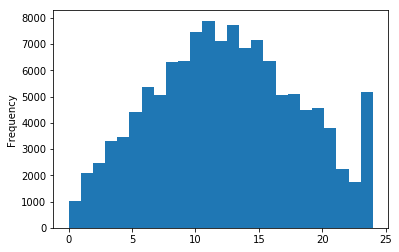

In [14]:
# Graph average shot frequencies based on time on the shot clock
shots['SHOT_CLOCK'].plot.hist(bins=25)

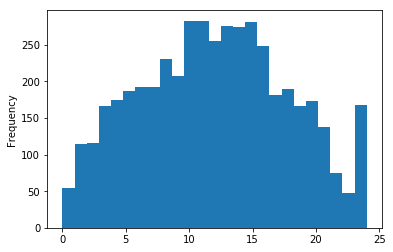

In [15]:
# Graph shot frequencies in the first two minutes of games based on time on the shot clock
first_two_min['SHOT_CLOCK'].plot.hist(bins=25)

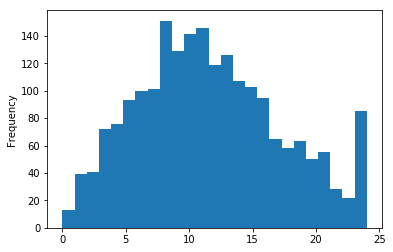

In [72]:
# Graph shot frequencies in the last two minutes of games based on time on the shot clock
last_two_min['SHOT_CLOCK'].plot.hist(bins=25)

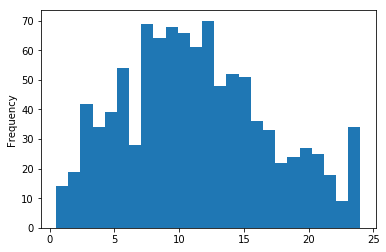

In [73]:
# Graph shot frequencies in the first two minutes of close games based on time on the shot clock
last_two_min_close['SHOT_CLOCK'].plot.hist(bins=25)

In [16]:
# Partition shots into shot clock ranges, with each range being 1 second of the 24 seconds of the shot clock
shot_clock_ranges = []
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 23) & (shots['SHOT_CLOCK'] <= 24)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 22) & (shots['SHOT_CLOCK'] < 23)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 21) & (shots['SHOT_CLOCK'] < 22)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 20) & (shots['SHOT_CLOCK'] < 21)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 19) & (shots['SHOT_CLOCK'] < 20)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 18) & (shots['SHOT_CLOCK'] < 19)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 17) & (shots['SHOT_CLOCK'] < 18)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 16) & (shots['SHOT_CLOCK'] < 17)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 15) & (shots['SHOT_CLOCK'] < 16)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 14) & (shots['SHOT_CLOCK'] < 15)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 13) & (shots['SHOT_CLOCK'] < 14)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 12) & (shots['SHOT_CLOCK'] < 13)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 11) & (shots['SHOT_CLOCK'] < 12)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 10) & (shots['SHOT_CLOCK'] < 11)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 9) & (shots['SHOT_CLOCK'] < 10)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 8) & (shots['SHOT_CLOCK'] < 9)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 7) & (shots['SHOT_CLOCK'] < 8)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 6) & (shots['SHOT_CLOCK'] < 7)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 5) & (shots['SHOT_CLOCK'] < 6)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 4) & (shots['SHOT_CLOCK'] < 5)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 3) & (shots['SHOT_CLOCK'] < 4)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 2) & (shots['SHOT_CLOCK'] < 3)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 1) & (shots['SHOT_CLOCK'] < 2)])
shot_clock_ranges.append(shots.loc[(shots['SHOT_CLOCK'] >= 0) & (shots['SHOT_CLOCK'] < 1)])

# Calculate field goal percentages, points per shot, and average shot distance for each shot clock range
field_goal_percentages = []
points_per_shots = []
shot_dist = []
for shot_range in shot_clock_ranges:
    field_goal_percentages.append(shot_range['FGM'].sum() / shot_range['FGM'].count())
    points_per_shots.append(shot_range['PTS'].sum() / shot_range['PTS'].count())
    shot_dist.append(shot_range['SHOT_DIST'].sum() / shot_range['SHOT_DIST'].count())

In [17]:
# Partition shots into shot clock ranges, with each range being 1 second of the 24 seconds of the shot clock
# For shots taken in the last two minutes of games
shot_clock_ranges_last_two = []
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 23) & (last_two_min['SHOT_CLOCK'] <= 24)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 22) & (last_two_min['SHOT_CLOCK'] < 23)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 21) & (last_two_min['SHOT_CLOCK'] < 22)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 20) & (last_two_min['SHOT_CLOCK'] < 21)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 19) & (last_two_min['SHOT_CLOCK'] < 20)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 18) & (last_two_min['SHOT_CLOCK'] < 19)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 17) & (last_two_min['SHOT_CLOCK'] < 18)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 16) & (last_two_min['SHOT_CLOCK'] < 17)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 15) & (last_two_min['SHOT_CLOCK'] < 16)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 14) & (last_two_min['SHOT_CLOCK'] < 15)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 13) & (last_two_min['SHOT_CLOCK'] < 14)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 12) & (last_two_min['SHOT_CLOCK'] < 13)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 11) & (last_two_min['SHOT_CLOCK'] < 12)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 10) & (last_two_min['SHOT_CLOCK'] < 11)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 9) & (last_two_min['SHOT_CLOCK'] < 10)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 8) & (last_two_min['SHOT_CLOCK'] < 9)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 7) & (last_two_min['SHOT_CLOCK'] < 8)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 6) & (last_two_min['SHOT_CLOCK'] < 7)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 5) & (last_two_min['SHOT_CLOCK'] < 6)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 4) & (last_two_min['SHOT_CLOCK'] < 5)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 3) & (last_two_min['SHOT_CLOCK'] < 4)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 2) & (last_two_min['SHOT_CLOCK'] < 3)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 1) & (last_two_min['SHOT_CLOCK'] < 2)])
shot_clock_ranges_last_two.append(last_two_min.loc[(last_two_min['SHOT_CLOCK'] >= 0) & (last_two_min['SHOT_CLOCK'] < 1)])

# Calculate field goal percentages, points per shot, and average shot distance for each shot clock range
field_goal_percentages_last_two = []
points_per_shots_last_two = []
shot_dist_last_two = []
for shot_range in shot_clock_ranges_last_two:
    field_goal_percentages_last_two.append(shot_range['FGM'].sum() / shot_range['FGM'].count())
    points_per_shots_last_two.append(shot_range['PTS'].sum() / shot_range['PTS'].count())
    shot_dist_last_two.append(shot_range['SHOT_DIST'].sum() / shot_range['SHOT_DIST'].count())



In [18]:
# Partition shots into shot clock ranges, with each range being 1 second of the 24 seconds of the shot clock
# For shots taken in the last two minutes of close games
shot_clock_ranges_last_two_close = []
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 23) & (last_two_min_close['SHOT_CLOCK'] <= 24)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 22) & (last_two_min_close['SHOT_CLOCK'] < 23)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 21) & (last_two_min_close['SHOT_CLOCK'] < 22)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 20) & (last_two_min_close['SHOT_CLOCK'] < 21)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 19) & (last_two_min_close['SHOT_CLOCK'] < 20)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 18) & (last_two_min_close['SHOT_CLOCK'] < 19)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 17) & (last_two_min_close['SHOT_CLOCK'] < 18)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 16) & (last_two_min_close['SHOT_CLOCK'] < 17)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 15) & (last_two_min_close['SHOT_CLOCK'] < 16)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 14) & (last_two_min_close['SHOT_CLOCK'] < 15)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 13) & (last_two_min_close['SHOT_CLOCK'] < 14)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 12) & (last_two_min_close['SHOT_CLOCK'] < 13)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 11) & (last_two_min_close['SHOT_CLOCK'] < 12)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 10) & (last_two_min_close['SHOT_CLOCK'] < 11)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 9) & (last_two_min_close['SHOT_CLOCK'] < 10)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 8) & (last_two_min_close['SHOT_CLOCK'] < 9)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 7) & (last_two_min_close['SHOT_CLOCK'] < 8)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 6) & (last_two_min_close['SHOT_CLOCK'] < 7)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 5) & (last_two_min_close['SHOT_CLOCK'] < 6)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 4) & (last_two_min_close['SHOT_CLOCK'] < 5)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 3) & (last_two_min_close['SHOT_CLOCK'] < 4)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 2) & (last_two_min_close['SHOT_CLOCK'] < 3)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 1) & (last_two_min_close['SHOT_CLOCK'] < 2)])
shot_clock_ranges_last_two_close.append(last_two_min_close.loc[(last_two_min_close['SHOT_CLOCK'] >= 0) & (last_two_min_close['SHOT_CLOCK'] < 1)])

# Calculate field goal percentages, points per shot, and average shot distance for each shot clock range
field_goal_percentages_last_two_close = []
points_per_shots_last_two_close = []
shot_dist_last_two_close = []
for shot_range in shot_clock_ranges_last_two_close:
    field_goal_percentages_last_two_close.append(shot_range['FGM'].sum() / shot_range['FGM'].count())
    points_per_shots_last_two_close.append(shot_range['PTS'].sum() / shot_range['PTS'].count())
    shot_dist_last_two_close.append(shot_range['SHOT_DIST'].sum() / shot_range['SHOT_DIST'].count())


#print (field_goal_percentages_last_two_close)
#print (points_per_shots_last_two_close)

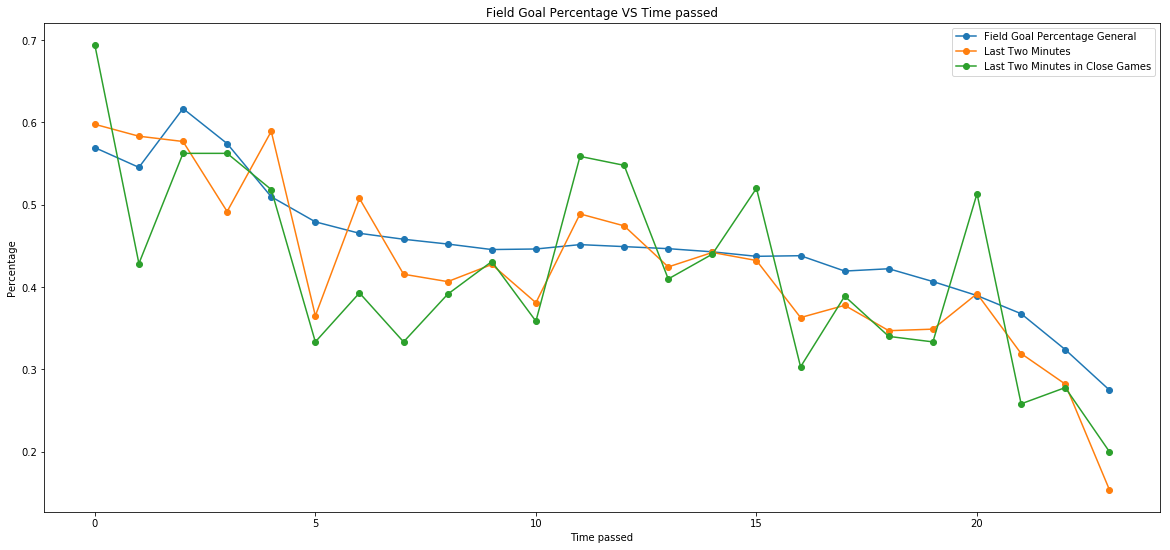

In [21]:
# Plot the field goal percentages of average shots, shots taken in the last two minutes,
# and shots taken in the last two minutes of close games, based on seconds into the shot clock when the shot was taken
plt.plot(field_goal_percentages, marker = 'o')
plt.plot(field_goal_percentages_last_two, marker = 'o')
plt.plot(field_goal_percentages_last_two_close, marker = 'o')

# Label lines
plt.legend(['Field Goal Percentage General', 'Last Two Minutes', 'Last Two Minutes in Close Games'])
plt.ylabel('Percentage')
plt.xlabel('Time passed')
plt.title('Field Goal Percentage VS Time passed')

#Change Dimensions
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

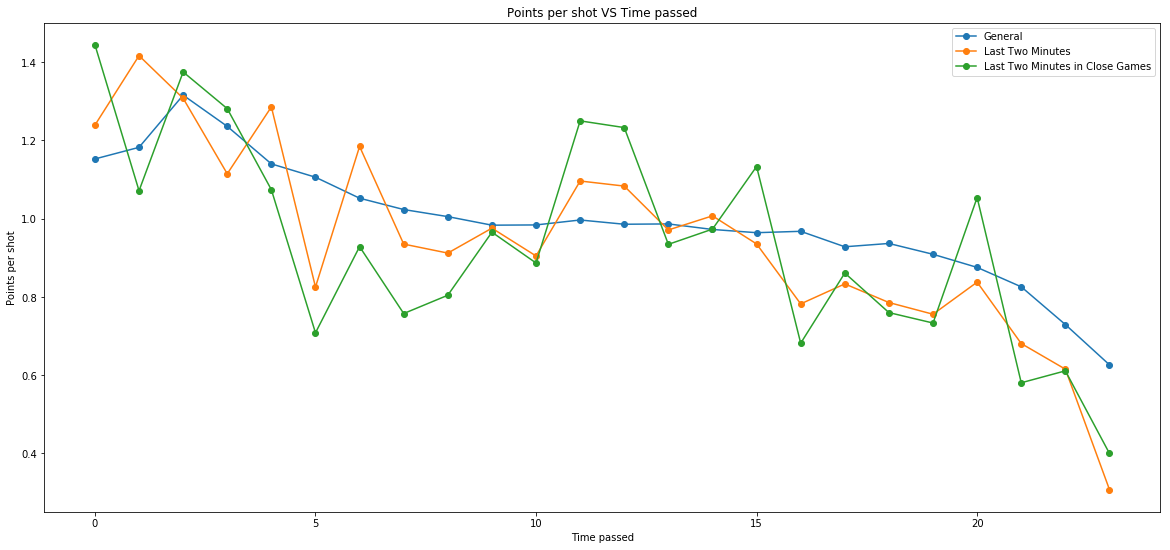

In [22]:
# Plot the points per shot of average shots, shots taken in the last two minutes,
# and shots taken in the last two minutes of close games, based on seconds into the shot clock when the shot was taken
plt.plot(points_per_shots, marker = 'o')
plt.plot(points_per_shots_last_two, marker = 'o')
plt.plot(points_per_shots_last_two_close, marker = 'o')

# Label lines
plt.legend(['General', 'Last Two Minutes', 'Last Two Minutes in Close Games'])
plt.ylabel('Points per shot')
plt.xlabel('Time passed')
plt.title('Points per shot VS Time passed')

#Change Dimensions
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

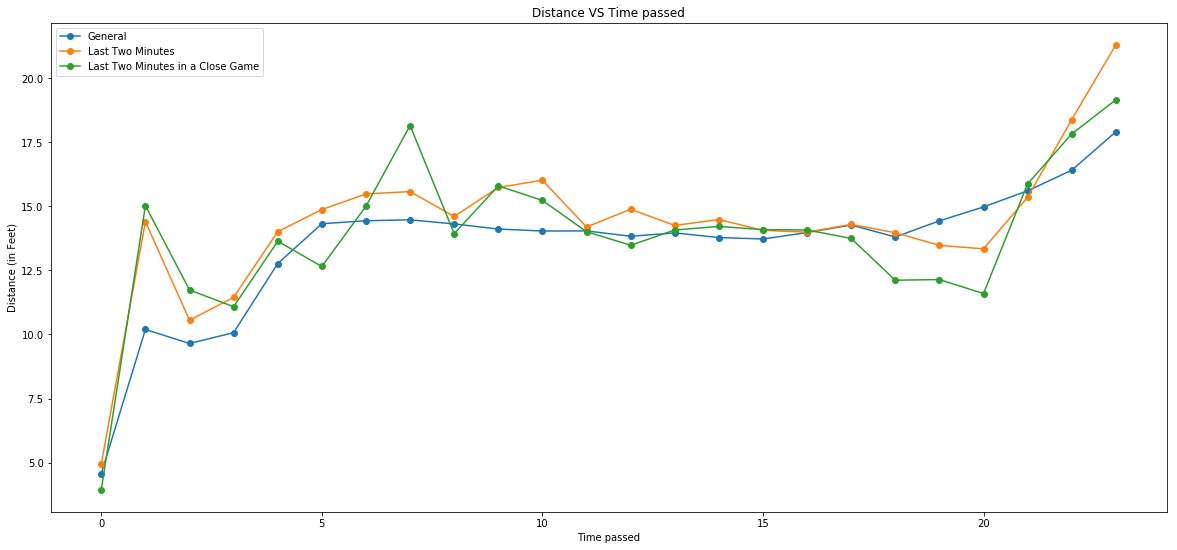

In [23]:
# Plot the shot distances of average shots, shots taken in the last two minutes,
# and shots taken in the last two minutes of close games, based on seconds into the shot clock when the shot was taken
plt.plot(shot_dist, marker = 'o')
plt.plot(shot_dist_last_two, marker = 'o')
plt.plot(shot_dist_last_two_close, marker = 'o')

# Label lines
plt.legend(['General', 'Last Two Minutes', 'Last Two Minutes in a Close Game'])
plt.ylabel('Distance (in Feet)')
plt.xlabel('Time passed')
plt.title('Distance VS Time passed')

#Change Dimensions
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

# Data Analysis & Results

The first graph showing the distribution of shot attempts stands out to us immediately since it appears to have a Gaussian distribution. Although it is not perfectly normally distributed around the mean, it still has the form of a Gaussian distribution with the outlier here being the 24 second shot. We believe this outlier to be unique because in order to have a chance to make it within the last second without a shot clock violation, players must shoot the ball immediately. This often leads to what is known as a “clutch” shot.

Looking at the second graph which shows the “Field Goal Percentage VS Time passed,” we can see that there is a clear relationship between the time that has passed as the team has held the ball and the percentage of shots that are made at that time difference. According to our data, the teams who attempt to shoot earlier are the ones who make more shots. This completely contradicts our hypothesis, which says that teams who take their time in shooting the ball will make more shots. 

To make this correlation more clear, here is a best fit line plot of the same data.

 
-0.009738 x + 0.5633


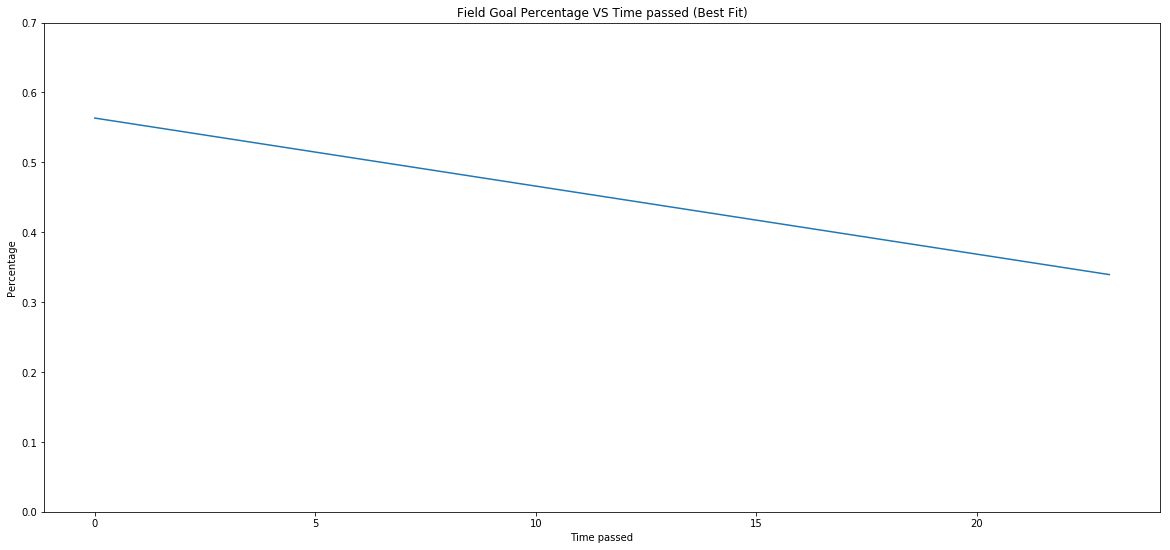

In [80]:
x = np.arange(24)
y = np.poly1d(np.polyfit(x, field_goal_percentages, 1))
plt.plot(np.unique(x), y(np.unique(x)))
plt.ylabel('Percentage')
plt.xlabel('Time passed')
plt.title('Field Goal Percentage VS Time passed (Best Fit)')
plt.ylim(bottom=0)
plt.ylim(top = 0.7)
print(y)

Our equation for the best fit line is y = -0.009738 x + 0.5633. The lower the value of x, which is the time passed in the shot clock, the higher chance a team has of making a field goal. This is an interesting discovery.

There are several possible reasons as to why our data contradicts our hypothesis:

1) Fastbreaks

2) Offensive Rebounds

3) Free-throw Offensive Rebounds

During a fastbreak, the defending team will get a defensive rebound or turnover and will run down the court as fast as possible to attempt a shot (which is usually a layup or a dunk). The team who initiates the fastbreak has a good chance of making the ball since they outrun other team due to their haste in grabbing the ball from the turnover and surprising the other team. Since the player who makes a shot attempt during a fastbreak does not usually have any defenders impeding him, he will most likely make the shot. Thus, because the fastbreak happens relatively quickly and the team who initiates it makes a shot attempt earlier in the shot clock, the fastbreak offers a good explanation as to why more shots are made earlier.

Before we delve into the offensive rebounds possibility, we must first explain the new rules that the NBA has introduced into the 2018-2019 NBA season. Starting this season, if a team picks up an offensive rebound then the shot clock will reset to 14 seconds for that team. The data we currently have is from the 2014-2015 NBA season where the shot clock always resets to 24 seconds, so it is not affected by this new ruling. The new ruling would definitely affect our data, and it would be interesting as a future topic of discussion to see how it would skew the field goal percentage and shot clock graph.

Offensive rebounds offer a good explanation as to why teams have a higher chance of making a shot earlier in the shot clock. When a team misses their own shot and grabs the offensive rebound, the ball often lands closer to the paint zone which is right next to the basket. Since centers are taller than most players who play the other positions, they utilize their height to grab the offensive rebound and make the basket (which happens earlier in the shot clock). In fact, it doesn’t have to be a center who grabs the offensive rebound and makes a shot attempt. The ball could be pushed behind the paint a bit and a player who plays a different position utilizes the offensive rebound to run up to the basket and make a layup early in the shot clock.

Similarly, free-throw offensive rebounds can explain why the data shows that early shot attempts are made more often. They are more rare than offensive rebounds in general since the defending team has two players that are closer to the basket. Regardless, they do affect the outcome of our data because players who get a free-throw offensive rebound will often utilize the surprise of the other plays to post a shot attempt.

Looking at the third line graph, “Distance vs Time Passed,” we can begin to provide statistical evidence to some of our previously made theories. Our main theory thus far is that field goal percentage is higher early in the shot clock primarily because of fast breaks and offensive rebounding. This graph shows that shots taken in the first 5 seconds are much closer to the basket than shots taken in the last 5 seconds, which is consistent with the claim that these early shots are layups and dunks from fastbreaks and offensive putbacks. 

Shots in the clutch are on average 18 feet away from the basket, while all shots in general are an average of 13 feet away. Contrary to our hypothesis, this difference in distance shows that plays are not being successfully executed with more time, but that plays are actually falling apart and devolving into long distance isolation shots and other contested hail mary type shots. 

<Input FG% vs Distance line graph> 

*Depending on the above graph, conclude if these late hail mary shots are actually effective shots like Harden’s stepback or if they are desperation shots*



Jason’s Analysis:

With respect to the bar graph depicting the average shot frequencies based on the time of the shot clock, there are many elements that can support our claim regarding the attempt of players to make “buzzer beater” or “clutch” shots. In the first two minutes of games, the frequency of shots is most numerous after 10 to 15 seconds have passed, in addition to there being some frequency of shots fired before 10 seconds have passed, although to a lesser degree. After 15 seconds have passed, we see a drastic decrease in the frequency of shots attempted; however, when only one second remains on the shot clock, there is an abnormally drastic increase in the frequency of shots attempted. This can be presumed to be the “clutch” shot many players are looking for in order to secure the game. Disregarding the effectiveness of the shot, players are frequently looking for a last second opportunity to make a shot. Now, with respect to the bar graph depicting the average shot frequency based on the first two minutes of games, we can see an almost similar pattern. With only minor differences, it appears players tend to shoot more in the beginning overall and less towards the end of the play. The data runs mostly the same. These “clutch” shots are considerably looked for and attempted. With respect to the last two minutes of games, the graph similarly displays the data, with the only difference being that there is a smaller overall frequency of shots being taken. This makes sense as players can become fatigued; however, the strategy seemingly does not change. The “clutch” shot is still present to the same proportion. With respect to the last two minutes of close games, we can see, once again, similar patterns, although with less overall frequency. In the last two minutes of close game, shots are being taken more towards the end as opposed to the beginning of the play with the outlier being the last second “clutch” shots. Considering this strategy can be seen in the data, one can assume that changes in whether the game is close or not affect the frequency and degree to which shots are being taken. In close games, the frequency of shots is far less, perhaps because there is a need to be accurate in order to win or perhaps due to fatigue. These data all depict shot frequency,  but how accurate are these players given the same conditions?

Looking at the first line graph, “Field Goal Percentage VS Time Passed,” we can see there is disparity pertaining to the field goal percentage within the first 5 seconds of both close games and not close games, as well as within the last five seconds. The field goal percentage in the first five seconds is greater than the field goal percentage in the last five seconds. In close games, it appears the number drastically drops and rises, suggesting there is an element in close games not necessarily present in not close games. Perhaps this element, which can be especially seen when twenty seconds have passed, implies players are very drastically looking for shots to take in order to win the game. These “clutch” shots make the difference in that they can be the difference between winning and losing a game. The field goal percentage, the general number of shots made versus attempted, decreases as the shot clock time increases or passes. This suggests the efficiency of shots generally decreases as the time progresses, with the exception of cases where it rises and falls very quickly. Generally, in not close games the efficiency of shots worsens, but in close games the field goal percentage can spike drastically to become back to being efficient, presumably because there is a need to do so in order to win the game. These late “hail mary” shots can be effective when taking into consideration how close the game is. The closer the game is, it appears, the more effective these “clutch” shots are, as opposed to in not close games where these shots follow a similar path, but to a lesser degree. Shots such as Harden’s stepback, a product of his footwork capability, can prove to be effective with respect to how much time is left on the shot clock. Perhaps, when it is necessary for an athlete to be accurate in order to win the game, there is an underlying element, such as their mentality or drive to win for example, that allows them this opportunity to become seemingly opportunistic and effective. 


# Ethics & Privacy

An ideal dataset provides a connection to the question or topic at hand, for the purpose of furthering our understanding of that topic. The data provided by these sets contain a variety of information, some of which may be available for use in the public and some which are more private. While undergoing the process of answering our research question, we had to consider the possibility that any private data we collect may be leaked and biases could potentially happen. During the process, these must be avoided in order to ensure the validity and credibility of our findings. Ethical considerations, with respect to the dataset and those researching, help guide the data as to ensure its validity and morality among its participants.

With respect to the dataset we will be using data from NBA.com/Stats, a public website providing substantial information on player turnovers, points, etc. The data by nature is open to the general public for use; therefore, we do not have any high concerns for privacy or consent. With respect to informed consent, players already affirmatively opt-in and have a clear understanding that data will be collected by the NBA. With respect to privacy, the association themselves released the dataset for public consumption. There is no need to mask the names of teams and/or games played due to having an open to the public dataset.

With respect to the processes and actions taken by the researchers themselves while manipulating the data, there is always a possibility of human bias.  As avid watchers of the NBA, we are very familiar with teams and athletes and probably have beliefs and/or ideas regarding them. By having preconceived notions of NBA players, it is possible to perhaps skew the data to compensate in favor of or against certain players. Even a subtle advantage or disadvantage would be enough to compromise the data and our findings. The dataset we are working with is very numerical and allows the advantage of making it extremely difficult to alter anything. We believe a double blind approach, where the player’s data would be anonymous to even us via the changing of name to random ones, is valuable for the reasons provided and more, but not necessary in this case.Our question requires numbers and statistics as research, specifically those of NBA players. Due to the objective nature of these questions, we believe it is not necessary to add this step.

In addition, other types of biases can happen. In order to avoid the bias of omitting confounding variables, we make sure to include the dataset in its entirety. Through peer review, we are all able to view the data provided and can account for and ensure the credibility of our research. Confirmation bias, in which one seeks out data that will intentionally correlate to what one predicts will happen, again can be mitigated via peer review. Advantageously, our dataset is numerically driven, making it very difficult to alter or omit in such a way as to benefit anything inorganic. 
It is important to remember that our data attempts to create an understanding of what form of play is best with respect to shot clock time. If a team manages to have an overall higher field goal percentage, that does not necessarily correlate to winning the game. Our data should not be misinterpreted to imply the greater the accuracy the greater the chance of winning because the amount of possessions is just as important. Those who view the data may assume our findings show that slower styles of play lead to more wins; however, this is false. To guard against misinterpretation of our data, we have emphasized our findings with graphs to visually represent the data. 

Ethical consideration is of great importance when researching because it can skew the researcher’s findings by either inflating or minimizing the data to one’s preferences. It is important to consider the morality of how one goes about collecting and manipulating data. We believe we have taken the necessary steps to ensure the validity and morality of our research


# Conclusion & Discussion

In conclusion, our hypothesis was quite wrong. Our expectation was that teams who took their time with running plays would be leaders in field goal percentage, but it turns out pace might be a more important factor than field goal percentage. The higher pace ends up leading to more early shots, and these early shots end up being the most efficient shots as well. 

FIeld goal percentage has a strong negative correlation with time passed in the shot clock, and it is almost always better to try and get in position for an early shot attempt. In conjunction with our collected data and analysis, it would be safe to assume that the team with the fastest pace should be winning the most games. This is because they are maximizing the amount of possessions they have, as well as increasing the amount of early shots that they can take. 

In contrast, if you take our data to the extreme it would suggest that a team that takes shots later in the shot clock would have the slowest pace, the worst field goal percentage, and the least amount of field goal attempts. 

Referring to 2019, there are two teams in the NBA that have very strict models; the Spurs and the Warriors These two teams are interesting to compare because of how different they are in playstyle, yet similar in success. There models are as follows: The Warriors have a fast pace (11th in the league) and typically shoot early in the shot clock and from long distance (3pt range); The Spurs have a slow pace (23rd in the league) and prefer to run successful plays, meaning they typically don’t take a shot till the end of the shot clock, and they try to be as close to the basketball as possible. The Warriors match the success metrics of our data better than the Spurs do, so it is no wonder why they have had better playoff success. 
